# Learning:

1. Hyperparameters vs Parameters:

  Hypyperparameters are inputs to the estimator or algorithm that you set, they are not learned by the algorithm in the modeling process. Parameters are learned by the algorithm and returned to you. You do not set these.

2. Grid Search: Construct a matrix of hyperparmeter combinations and values 
3. Random Search: main difference is selecting (n) random combinations, more efficient
4. Informed search: each iteration learns from the last

  Coarse to Fine, Bayesian Hyperparamter tuning, Genetic algorithms 

# Course Description
Building powerful machine learning models depends heavily on the set of hyperparameters used. But with increasingly complex models with lots of options, how do you efficiently find the best settings for your particular problem? In this course you will get practical experience in using some common methodologies for automated hyperparameter tuning in Python using Scikit Learn. These include Grid Search, Random Search & advanced optimization methodologies including Bayesian & Genetic algorithms . You will use a dataset predicting credit card defaults as you build skills to dramatically increase the efficiency and effectiveness of your machine learning model building.




# CHAPTER 1

## Hyperparameter and Parameters

In this introductory chapter you will learn the difference between hyperparameters and parameters. You will practice extracting and analyzing parameters, setting hyperparameter values for several popular machine learning algorithms. Along the way you will learn some best practice tips & tricks for choosing which hyperparameters to tune and what values to set & build learning curves to analyze your hyperparameter choices.

# Extracting a Logistic Regression parameter
You are now going to practice extracting an important parameter of the logistic regression model. The logistic regression has a few other parameters you will not explore here but you can review them in the scikit-learn.org documentation for the LogisticRegression() module under 'Attributes'.

This parameter is important for understanding the direction and magnitude of the effect the variables have on the target.

In this exercise we will extract the coefficient parameter (found in the coef_ attribute), zip it up with the original column names, and see which variables had the largest positive effect on the target variable.

You will have available:

A logistic regression model object named log_reg_clf
The X_train DataFrame
sklearn and pandas have been imported for you.

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df= pd.read_csv('credit-card-full.csv')
X= df.drop(['ID', 'default payment next month'], axis=1)
X_train=X[:1600]
y= df['default payment next month']
y_train= y[:1600]
log_reg_clf= LogisticRegression()
log_reg_clf.fit(X_train, y_train)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [41]:
# Create a list of original variable names from the training DataFrame
original_variables = X_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by="Coefficient", axis=0, ascending=False)[0:3]
print(top_three_df)

     Variable  Coefficient
0   LIMIT_BAL    -0.000004
1         SEX    -0.000004
2   EDUCATION    -0.000005
3    MARRIAGE    -0.000004
4         AGE    -0.000074
5       PAY_0     0.000003
6       PAY_2     0.000002
7       PAY_3     0.000002
8       PAY_4     0.000002
9       PAY_5     0.000002
10      PAY_6     0.000001
11  BILL_AMT1    -0.000018
12  BILL_AMT2     0.000006
13  BILL_AMT3     0.000013
14  BILL_AMT4     0.000001
15  BILL_AMT5     0.000007
16  BILL_AMT6    -0.000005
17   PAY_AMT1    -0.000053
18   PAY_AMT2    -0.000051
19   PAY_AMT3    -0.000009
20   PAY_AMT4    -0.000034
21   PAY_AMT5     0.000010
22   PAY_AMT6     0.000002
     Variable  Coefficient
13  BILL_AMT3     0.000013
21   PAY_AMT5     0.000010
15  BILL_AMT5     0.000007


# Extracting a Random Forest parameter
You will now translate the work previously undertaken on the logistic regression model to a random forest model. A parameter of this model is, for a given tree, how it decided to split at each level.

This analysis is not as useful as the coefficients of logistic regression as you will be unlikely to ever explore every split and every tree in a random forest model. However, it is a very useful exercise to peak under the hood at what the model is doing.

In this exercise we will extract a single tree from our random forest model, visualize it and programmatically extract one of the splits.

You have available:

A random forest model object, rf_clf
An image of the top of the chosen decision tree, tree_viz_image
The X_train DataFrame & the original_variables list

In [ ]:
# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# Visualize the graph using the provided image
imgplot = plt.imshow(tree_viz_image)
plt.show()

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))

# Hyperparameters in Random Forests
As you saw, there are many different hyperparameters available in a Random Forest model using Scikit Learn. Here you can remind yourself how to differentiate between a hyperparameter and a parameter, and easily check whether something is a hyperparameter.

You can create a random forest estimator yourself from the imported Scikit Learn package. Then print this estimator out to see the hyperparameters and their values.

Which of the following is a hyperparameter for the Scikit Learn random forest model?

oob_score

# Exploring Random Forest Hyperparameters
Understanding what hyperparameters are available and the impact of different hyperparameters is a core skill for any data scientist. As models become more complex, there are many different settings you can set, but only some will have a large impact on your model.

You will now assess an existing random forest model (it has some bad choices for hyperparameters!) and then make better choices for a new random forest model and assess its performance.

You will have available:

X_train, X_test, y_train, y_test DataFrames
An existing pre-trained random forest estimator, rf_clf_old
The predictions of the existing random forest estimator on the test set, rf_old_predictions

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
rf_clf_old= RandomForestClassifier(n_estimators=5, random_state=42)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.20, random_state=42)
rf_clf_old.fit(X_train, y_train)
rf_old_predictions= rf_clf_old.predict(X_test)

In [43]:
# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  confusion_matrix(y_test, rf_old_predictions),
  accuracy_score(y_test, rf_old_predictions))) 

# Create a new random forest classifier with better hyperparamaters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

# Assess the new model (using new predictions!)
print("Confusion Matrix: \n\n", confusion_matrix(y_test, rf_new_predictions))
print("Accuracy Score: \n\n", accuracy_score(y_test, rf_new_predictions))

# got boost when changing hyperparameters

RandomForestClassifier(n_estimators=5, random_state=42)
Confusion Matrix: 

 [[4233  454]
 [ 829  484]] 
 Accuracy Score: 

 0.7861666666666667
Confusion Matrix: 

 [[4419  268]
 [ 825  488]]
Accuracy Score: 

 0.8178333333333333


# Hyperparameters of KNN
To apply the concepts learned in the prior exercise, it is good practice to try out learnings on a new algorithm. The k-nearest-neighbors algorithm is not as popular as it used to be but can still be an excellent choice for data that has groups of data that behave similarly. Could this be the case for our credit card users?

In this case you will try out several different values for one of the core hyperparameters for the knn algorithm and compare performance.

You will have available:

X_train, X_test, y_train, y_test DataFrames

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

The accuracy of 5, 10, 20 neighbours was 0.7561666666666667, 0.7761666666666667, 0.7801666666666667


# Automating Hyperparameter Choice
Finding the best hyperparameter of interest without writing hundreds of lines of code for hundreds of models is an important efficiency gain that will greatly assist your future machine learning model building.

An important hyperparameter for the GBM algorithm is the learning rate. But which learning rate is best for this problem? By writing a loop to search through a number of possibilities, collating these and viewing them you can find the best one.

Possible learning rates to try include 0.001, 0.01, 0.05, 0.1, 0.2 and 0.5

You will have available X_train, X_test, y_train & y_test datasets, and GradientBoostingClassifier has been imported for you.

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
df1= df[0:2000]
df1
X= df1.drop(['ID', 'default payment next month'], axis=1)
y= df1['default payment next month']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.20, random_state=42)

In [47]:
# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for x in learning_rates:
    model = GradientBoostingClassifier(learning_rate=x)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([x, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

   learning_rate  accuracy
0          0.001    0.7975
1          0.010    0.7950
2          0.050    0.8275
3          0.100    0.8100
4          0.200    0.8125
5          0.500    0.7950


# Building Learning Curves
If we want to test many different values for a single hyperparameter it can be difficult to easily view that in the form of a DataFrame. Previously you learned about a nice trick to analyze this. A graph called a 'learning curve' can nicely demonstrate the effect of increasing or decreasing a particular hyperparameter on the final result.

Instead of testing only a few values for the learning rate, you will test many to easily see the effect of this hyperparameter across a large range of values. A useful function from NumPy is np.linspace(start, end, num) which allows you to create a number of values (num) evenly spread within an interval (start, end) that you specify.

You will have available X_train, X_test, y_train & y_test datasets.

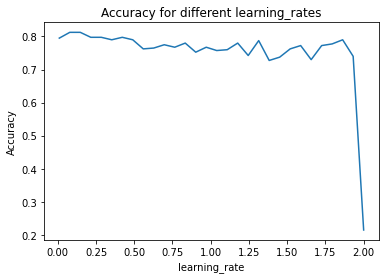

In [48]:
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show() 

# accuracy drops when learning rate gets over 1.5

# CHAPTER 2

## Grid Search

This chapter introduces you to a popular automated hyperparameter tuning methodology called Grid Search. You will learn what it is, how it works and practice undertaking a Grid Search using Scikit Learn. You will then learn how to analyze the output of a Grid Search & gain practical experience doing this.

# Build Grid Search functions
In data science it is a great idea to try building algorithms, models and processes 'from scratch' so you can really understand what is happening at a deeper level. Of course there are great packages and libraries for this work (and we will get to that very soon!) but building from scratch will give you a great edge in your data science work.

In this exercise, you will create a function to take in 2 hyperparameters, build models and return results. You will use this function in a future exercise.

You will have available the X_train, X_test, y_train and y_test datasets available.

In [49]:
# Create the function
def gbm_grid_search(learning_rate, max_depth):

	# Create the model
    model = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth)
    
    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Return the hyperparameters and score
    return([learning_rate, max_depth, accuracy_score(y_test, predictions)])

# Iteratively tune multiple hyperparameters
In this exercise, you will build on the function you previously created to take in 2 hyperparameters, build a model and return the results. You will now use that to loop through some values and then extend this function and loop with another hyperparameter.

The function gbm_grid_search(learn_rate, max_depth) is available in this exercise.

If you need to remind yourself of the function you can run the function print_func() that has been created for you

In [50]:
# Create the relevant lists
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2,4,6]

# Create the for loop
for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learn_rate,max_depth))

# Print the results
print(results_list)   

[[0.01, 2, 0.7975], [0.01, 4, 0.81], [0.01, 6, 0.81], [0.1, 2, 0.8125], [0.1, 4, 0.81], [0.1, 6, 0.8025], [0.5, 2, 0.7775], [0.5, 4, 0.7925], [0.5, 6, 0.78]]


In [51]:
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2,4,6]

# Extend the function input
def gbm_grid_search_extended(learn_rate, max_depth, subsample):

	# Extend the model creation section
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth, subsample=subsample)
    
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Extend the return part
    return([learn_rate, max_depth, subsample, accuracy_score(y_test, predictions)])       

In [52]:
results_list = []

# Create the new list to test
subsample_list = [0.4, 0.6]

for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
    
    	# Extend the for loop
        for subsample in subsample_list:
        	
            # Extend the results to include the new hyperparameter
            results_list.append(gbm_grid_search_extended(learn_rate, max_depth, subsample))
            
# Print results
print(results_list)            

[[0.01, 2, 0.4, 0.8025], [0.01, 2, 0.6, 0.8], [0.01, 4, 0.4, 0.815], [0.01, 4, 0.6, 0.8175], [0.01, 6, 0.4, 0.815], [0.01, 6, 0.6, 0.82], [0.1, 2, 0.4, 0.8075], [0.1, 2, 0.6, 0.815], [0.1, 4, 0.4, 0.8125], [0.1, 4, 0.6, 0.8075], [0.1, 6, 0.4, 0.7925], [0.1, 6, 0.6, 0.805], [0.5, 2, 0.4, 0.785], [0.5, 2, 0.6, 0.765], [0.5, 4, 0.4, 0.7575], [0.5, 4, 0.6, 0.765], [0.5, 6, 0.4, 0.705], [0.5, 6, 0.6, 0.7575]]


In [53]:
from sklearn import metrics
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

# GridSearchCV with Scikit Learn
The GridSearchCV module from Scikit Learn provides many useful features to assist with efficiently undertaking a grid search. You will now put your learning into practice by creating a GridSearchCV object with certain parameters.

The desired options are:

A Random Forest Estimator, with the split criterion as 'entropy'
5-fold cross validation
The hyperparameters max_depth (2, 4, 8, 15) and max_features ('auto' vs 'sqrt')
Use roc_auc to score the models
Use 4 cores for processing in parallel
Ensure you refit the best model and return training scores
You will have available X_train, X_test, y_train & y_test datasets.

In [54]:
from sklearn.model_selection import GridSearchCV
# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parameter grid
param_grid = {'max_depth': [2,4,8,15], 'max_features': ['auto', 'sqrt']} 

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True, return_train_score=True)
print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='roc_auc')


# Exploring the grid search results
You will now explore the cv_results_ property of the GridSearchCV object defined in the video. This is a dictionary that we can read into a pandas DataFrame and contains a lot of useful information about the grid search we just undertook.

A reminder of the different column types in this property:

time_ columns

param_ columns (one for each hyperparameter) and the singular params column (with all hyperparameter settings)

a train_score column for each cv fold including the mean_train_score and std_train_score columns

a test_score column for each cv fold including the mean_test_score and std_test_score columns

a rank_test_score column with a number from 1 to n (number of iterations) ranking the rows based on their mean_test_score

In [55]:
grid_rf_class.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='roc_auc')

In [56]:
from sklearn.model_selection import GridSearchCV
# Read the cv_results property into a dataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print('cv_results:', cv_results_df)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ["params"]]
print('hyperparmeters:', column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df["rank_test_score"] == 1]
print('best_score:', best_row)

cv_results:    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.672983      0.048873         0.047977        0.012984   
1       0.679266      0.061392         0.052585        0.003470   
2       0.880777      0.025770         0.045640        0.012453   
3       0.877963      0.046474         0.048021        0.010367   
4       1.292855      0.065996         0.047509        0.018342   
5       2.164539      0.252663         0.090103        0.021245   
6       1.676160      0.223933         0.060574        0.009208   
7       1.347266      0.237257         0.036573        0.015763   

  param_max_depth param_max_features  \
0               2               auto   
1               2               sqrt   
2               4               auto   
3               4               sqrt   
4               8               auto   
5               8               sqrt   
6              15               auto   
7              15               sqrt   

                       

# Analyzing the best results
At the end of the day, we primarily care about the best performing 'square' in a grid search. Luckily Scikit Learn's gridSearchCv objects have a number of parameters that provide key information on just the best square (or row in cv_results_).

Three properties you will explore are:

best_score_ – The score (here ROC_AUC) from the best-performing square.

best_index_ – The index of the row in cv_results_ containing information on the best-performing square.

best_params_ – A dictionary of the parameters that gave the best score, for example 'max_depth': 10

The grid search object grid_rf_class is available.

A dataframe (cv_results_df) has been created from the cv_results_ for you on line 6. This will help you index into the results.

In [57]:
# Print out the ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
print(best_score)

# Create a variable from the row related to the best-performing square
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
print(best_row)

# Get the n_estimators parameter from the best-performing square and print
best_n_estimators = grid_rf_class.best_params_
print(best_n_estimators)

0.7318746124942426
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       0.880777       0.02577          0.04564        0.012453   

  param_max_depth param_max_features  \
2               4               auto   

                                     params  split0_test_score  \
2  {'max_depth': 4, 'max_features': 'auto'}               0.65   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
2           0.755343           0.727077  ...         0.731875        0.045311   

   rank_test_score  split0_train_score  split1_train_score  \
2                1            0.822806            0.818246   

   split2_train_score  split3_train_score  split4_train_score  \
2            0.819401            0.811319            0.811456   

   mean_train_score  std_train_score  
2          0.816646         0.004548  

[1 rows x 22 columns]
{'max_depth': 4, 'max_features': 'auto'}


# Using the best results
While it is interesting to analyze the results of our grid search, our final goal is practical in nature; we want to make predictions on our test set using our estimator object.

We can access this object through the best_estimator_ property of our grid search object.

Let's take a look inside the best_estimator_ property, make predictions, and generate evaluation scores. We will firstly use the default predict (giving class predictions), but then we will need to use predict_proba rather than predict to generate the roc-auc score as roc-auc needs probability scores for its calculation. We use a slice [:,1] to get probabilities of the positive class.

You have available the X_test and y_test datasets to use and the grid_rf_class object from previous exercises.

In [58]:
from sklearn.metrics import roc_auc_score
# See what type of object the best_estimator_ property is
print(type(grid_rf_class.best_estimator_))

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix 
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0 0 0 0 0]
Confusion Matrix 
 [[318   1]
 [ 72   9]]
ROC-AUC Score 
 0.7225511823212972


# CHAPTER 3

## Random Search

In this chapter you will be introduced to another popular automated hyperparameter tuning methodology called Random Search. You will learn what it is, how it works and importantly how it differs from grid search. You will learn some advantages and disadvantages of this method and when to choose this method compared to Grid Search. You will practice undertaking a Random Search with Scikit Learn as well as visualizing & interpreting the output.

# Randomly Sample Hyperparameters
To undertake a random search, we firstly need to undertake a random sampling of our hyperparameter space.

In this exercise, you will firstly create some lists of hyperparameters that can be zipped up to a list of lists. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

You will use just the hyperparameters learning_rate and min_samples_leaf of the GBM algorithm to keep the example illustrative and not overly complicated.

In [63]:
from itertools import product

# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01,1.5,200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10,41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
print(combinations_random_chosen)

[[1.4775376884422111, 38], [1.3352763819095477, 21], [0.43678391959798996, 27], [0.7437688442211056, 14], [1.327788944723618, 27], [0.04743718592964824, 17], [1.200502512562814, 23], [1.4625628140703517, 37], [1.1930150753768844, 17], [0.30201005025125627, 34], [0.15974874371859296, 15], [0.668894472361809, 38], [0.691356783919598, 29], [0.1822110552763819, 19], [1.178040201005025, 27], [0.7287939698492463, 10], [0.48170854271356783, 29], [1.1630653266331659, 37], [0.287035175879397, 11], [1.1406030150753768, 34], [1.3951758793969848, 36], [0.039949748743718594, 32], [1.222964824120603, 33], [0.5565829145728644, 13], [0.8036683417085427, 21], [0.8485929648241206, 22], [0.09236180904522612, 10], [0.7886934673366834, 40], [1.3802010050251257, 35], [1.2379396984924622, 33], [0.287035175879397, 30], [1.4401005025125628, 38], [0.9234673366834171, 27], [1.305326633165829, 14], [1.1930150753768844, 12], [1.095678391959799, 18], [1.1855276381909547, 20], [0.5041708542713568, 16], [1.1555778894

# Randomly Search with Random Forest
To solidify your knowledge of random sampling, let's try a similar exercise but using different hyperparameters and a different algorithm.

As before, create some lists of hyperparameters that can be zipped up to a list of lists. You will use the hyperparameters criterion, max_depth and max_features of the random forest algorithm. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

You will use a slightly different package for sampling in this task, random.sample().

In [60]:
import random
# Create lists for criterion and max_features
criterion_list = ["gini", "entropy"]
max_feature_list = ["auto", "sqrt", "log2", None]

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3,56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)

[['entropy', 'sqrt', 9], ['entropy', 'log2', 35], ['entropy', 'log2', 43], ['entropy', 'sqrt', 13], ['gini', 'auto', 48], ['entropy', 'log2', 4], ['entropy', 'auto', 41], ['gini', 'sqrt', 52], ['entropy', 'auto', 6], ['entropy', 'log2', 54], ['entropy', 'sqrt', 51], ['entropy', 'sqrt', 39], ['gini', 'log2', 7], ['entropy', None, 37], ['entropy', None, 35], ['gini', None, 35], ['gini', None, 42], ['entropy', 'log2', 34], ['gini', 'log2', 5], ['gini', 'sqrt', 27], ['entropy', 'auto', 27], ['entropy', 'log2', 23], ['gini', 'sqrt', 41], ['entropy', 'sqrt', 28], ['gini', None, 17], ['gini', 'auto', 45], ['entropy', 'log2', 51], ['entropy', 'sqrt', 8], ['entropy', 'log2', 31], ['gini', 'auto', 47], ['entropy', 'auto', 31], ['gini', None, 5], ['gini', None, 50], ['gini', 'auto', 24], ['gini', 'log2', 34], ['entropy', 'sqrt', 23], ['gini', 'auto', 6], ['entropy', 'auto', 8], ['gini', 'sqrt', 54], ['gini', None, 29], ['entropy', 'sqrt', 11], ['gini', 'auto', 44], ['entropy', None, 41], ['entrop

# Visualizing a Random Search
Visualizing the search space of random search allows you to easily see the coverage of this technique and therefore allows you to see the effect of your sampling on the search space.

In this exercise you will use several different samples of hyperparameter combinations and produce visualizations of the search space.

The function sample_and_visualize_hyperparameters() takes a single argument (number of combinations to sample) and then randomly samples hyperparameter combinations, just like you did in the last exercise! The function will then visualize the combinations.

If you want to see the function definition, you can use Python's handy inspect library, like so:

print(inspect.getsource(sample_and_visualize_hyperparameters))

In [65]:
x_lims= [0.01, 1.5]
y_lims= [10, 29]
def sample_and_visualize_hyperparameters(n_samples):

  # If asking for all combinations, just return the entire list.
  if n_samples == len(combinations_list):
    combinations_random_chosen = combinations_list
  else:
    combinations_random_chosen = []
    random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
    combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
    
  # Pull out the X and Y to plot
  rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

  # Plot 
  plt.clf() 
  plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
  plt.gca().set_xlim(x_lims)
  plt.gca().set_ylim(y_lims)
  plt.show()


6200


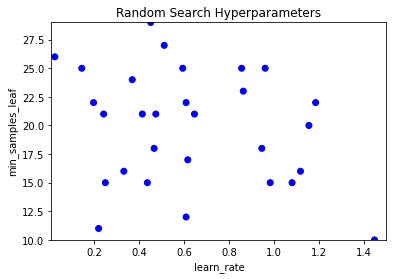

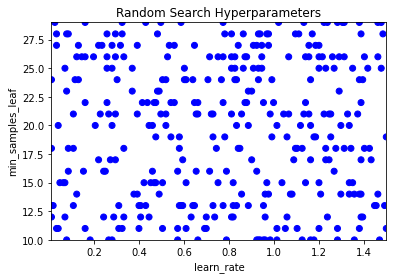

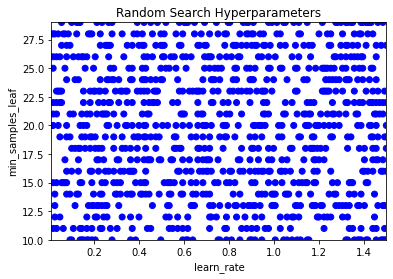

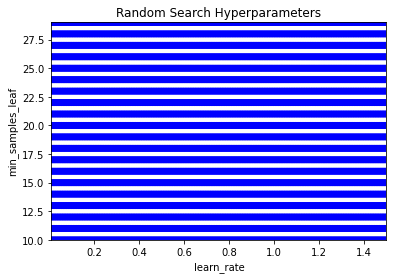

In [66]:
# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
 sample_and_visualize_hyperparameters(x)
    
# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)

# RandomSearchCV inputs
Let's test your knowledge of how RandomizedSearchCV differs from GridSearchCV.

You can check the documentation on Scitkit Learn's website to compare these two functions.

Which of these parameters is only for a RandomizedSearchCV?

n_iter

# The RandomizedSearchCV Object
Just like the GridSearchCV library from Scikit Learn, RandomizedSearchCV provides many useful features to assist with efficiently undertaking a random search. You're going to create a RandomizedSearchCV object, making the small adjustment needed from the GridSearchCV object.

The desired options are:

A default Gradient Boosting Classifier Estimator

5-fold cross validation

Use accuracy to score the models

Use 4 cores for processing in parallel

Ensure you refit the best model and return training scores

Randomly sample 10 models

The hyperparameter grid should be for learning_rate (150 values between 0.1 and 2) and min_samples_leaf (all values between and including 20 and 64).

You will have available X_train & y_train datasets.

In [67]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1, 2, 150), 'min_samples_leaf': list(range(20, 65))} 

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = param_grid,
    n_iter = 10,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

[0.18926174496644296 0.49530201342281877 0.125503355704698
 1.8979865771812081 1.1583892617449665 0.9671140939597315
 1.2986577181208054 1.5026845637583892 2.0 0.9926174496644294]
[56 20 49 60 47 64 33 35 21 49]


# RandomSearchCV in Scikit Learn
Let's practice building a RandomizedSearchCV object using Scikit Learn.

The hyperparameter grid should be for max_depth (all values between and including 5 and 25) and max_features ('auto' and 'sqrt').

The desired options for the RandomizedSearchCV object are:

A RandomForestClassifier Estimator with n_estimators of 80.

3-fold cross validation (cv)

Use roc_auc to score the models

Use 4 cores for processing in parallel (n_jobs)

Ensure you refit the best model and return training scores

Only sample 5 models for efficiency (n_iter)

X_train & y_train datasets are loaded for you.

Remember, to extract the chosen hyperparameters these are found in cv_results_ with a column per hyperparameter. For example, the column for the hyperparameter criterion would be param_criterion

In [68]:
# Create the parameter grid
param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True )

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])



[6 22 12 21 21]
['sqrt' 'auto' 'auto' 'sqrt' 'auto']


# Comparing Random & Grid Search
In the video, you just studied some of the advantages and disadvantages of random search as compared to grid search.

Which of the following is an advantage of random search?

It is more computationally efficient than Grid Search.

# Grid and Random Search Side by Side
Visualizing the search space of random and grid search together allows you to easily see the coverage that each technique has and therefore brings to life their specific advantages and disadvantages.

In this exercise, you will sample hyperparameter combinations in a grid search way as well as a random search way, then plot these to see the difference.

You will have available:

combinations_list which is a list of combinations of learn_rate and min_samples_leaf for this algorithm

The function visualize_search() which will make your hyperparameter combinations into X and Y coordinates and plot both grid and random search combinations on the same graph. It takes as input two lists of hyperparameter combinations.

If you wish to view the visualize_search() function definition, you can run this code:

In [69]:
x_lims= [0.01, 3.0]
y_lims= [5,24]
def visualize_search(grid_combinations_chosen, random_combinations_chosen):
  grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
  rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

  # Plot all together
  plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
  plt.gca().set_xlim(x_lims)
  plt.gca().set_ylim(y_lims)
  plt.show()

In [70]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Print result
print(grid_combinations_chosen)

[[0.01, 10], [0.01, 11], [0.01, 12], [0.01, 13], [0.01, 14], [0.01, 15], [0.01, 16], [0.01, 17], [0.01, 18], [0.01, 19], [0.01, 20], [0.01, 21], [0.01, 22], [0.01, 23], [0.01, 24], [0.01, 25], [0.01, 26], [0.01, 27], [0.01, 28], [0.01, 29], [0.01, 30], [0.01, 31], [0.01, 32], [0.01, 33], [0.01, 34], [0.01, 35], [0.01, 36], [0.01, 37], [0.01, 38], [0.01, 39], [0.01, 40], [0.017487437185929648, 10], [0.017487437185929648, 11], [0.017487437185929648, 12], [0.017487437185929648, 13], [0.017487437185929648, 14], [0.017487437185929648, 15], [0.017487437185929648, 16], [0.017487437185929648, 17], [0.017487437185929648, 18], [0.017487437185929648, 19], [0.017487437185929648, 20], [0.017487437185929648, 21], [0.017487437185929648, 22], [0.017487437185929648, 23], [0.017487437185929648, 24], [0.017487437185929648, 25], [0.017487437185929648, 26], [0.017487437185929648, 27], [0.017487437185929648, 28], [0.017487437185929648, 29], [0.017487437185929648, 30], [0.017487437185929648, 31], [0.01748743

In [71]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

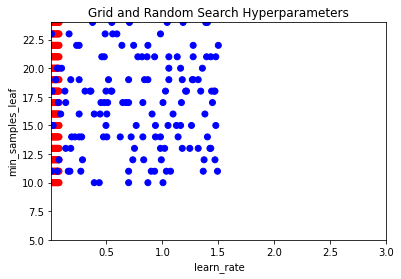

In [72]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)

# You can really see how a grid search will cover a small area completely  
# random search will cover a much larger area but not completely.


# Visualizing Coarse to Fine
You're going to undertake the first part of a Coarse to Fine search. This involves analyzing the results of an initial random search that took place over a large search space, then deciding what would be the next logical step to make your hyperparameter search finer.

You have available:

combinations_list - a list of the possible hyperparameter combinations the random search was undertaken on.

results_df - a DataFrame that has each hyperparameter combination and the resulting accuracy of all 500 trials. Each hyperparameter is a column, with the header the hyperparameter name.

visualize_hyperparameter() - a function that takes in a column of the DataFrame (as a string) and produces a scatter plot of this column's values compared to the accuracy scores. An example call of the function would be visualize_hyperparameter('accuracy')
If you wish to view the visualize_hyperparameter() function definition, you can run this code:

In [73]:
def visualize_hyperparameter(name):
  plt.clf()
  plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
  plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
  plt.gca().set_ylim([0,100])
  plt.show()

In [75]:
# Confirm the size of the combinations_list
print(len(combinations_list))

# Sort the results_df by accuracy and print the top 10 rows
print(results_df.sort_values(by='accuracy', ascending=False).head(10))

# Confirm which hyperparameters were used in this search
print(results_df.columns)

# Call visualize_hyperparameter() with each hyperparameter in turn
visualize_hyperparameter('max_depth')
visualize_hyperparameter('min_samples_leaf')
visualize_hyperparameter('learning_rate')

6200
   learning_rate  accuracy
2          0.050    0.8275
4          0.200    0.8125
3          0.100    0.8100
0          0.001    0.7975
1          0.010    0.7950
5          0.500    0.7950
Index(['learning_rate', 'accuracy'], dtype='object')


# Coarse to Fine Iterations
You will now visualize the first random search undertaken, construct a tighter grid and check the results. You will have available:

results_df - a DataFrame that has the hyperparameter combination and the resulting accuracy of all 500 trials. Only the hyperparameters that had the strongest visualizations from the previous exercise are included (max_depth and learn_rate)

visualize_first() - This function takes no arguments but will visualize each of your hyperparameters against accuracy for your first random search.

In [76]:
def visualize_first():
  for name in results_df.columns[0:2]:
    plt.clf()
    plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    x_line = 20
    if name == "learn_rate":
      	x_line = 1
    plt.axvline(x=x_line, color="red", linewidth=4)
    plt.show() 

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid
param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True )

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.best_params_['max_depth'])
print(random_rf_class.best_params_['max_features'])

6
sqrt


In [78]:
# Use the provided function to visualize the first results
visualize_first()

# Create some combinations lists & combine:
max_depth_list = list(range(1,21))
learn_rate_list = np.linspace(0.001,1,50)

# Call the function to visualize the second results
visualize_second()

# Bayes Rule in Python
In this exercise you will undertake a practical example of setting up Bayes formula, obtaining new evidence and updating your 'beliefs' in order to get a more accurate result. The example will relate to the likelihood that someone will close their account for your online software product.

These are the probabilities we know:

7% (0.07) of people are likely to close their account next month

15% (0.15) of people with accounts are unhappy with your product (you don't know who though!)

35% (0.35) of people who are likely to close their account are unhappy with your product

In [79]:
# Assign probabilities to variables 
p_unhappy = 0.15
p_unhappy_close = 0.35

# Probabiliy someone will close
p_close = 0.07

# Probability unhappy person will close
p_close_unhappy = (p_unhappy_close * p_close) / p_unhappy
print(p_close_unhappy)

0.16333333333333336


# Bayesian Hyperparameter tuning with Hyperopt
In this example you will set up and run a Bayesian hyperparameter optimization process using the package Hyperopt (already imported as hp for you). You will set up the domain (which is similar to setting up the grid for a grid search), then set up the objective function. Finally, you will run the optimizer over 20 iterations.

You will need to set up the domain using values:

max_depth using quniform distribution (between 2 and 10, increasing by 2)
learning_rate using uniform distribution (0.001 to 0.9)
Note that for the purpose of this exercise, this process was reduced in data sample size and hyperopt & GBM iterations. If you are trying out this method by yourself on your own machine, try a larger search space, more trials, more cvs and a larger dataset size to really see this in action!

In [80]:

from hyperopt import hp

In [81]:
from hyperopt import hp
from hyperopt import fmin, tpe
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Set up space dictionary with specified hyperparameters
space = {'max_depth': hp.quniform('max_depth', 2, 10, 2),'learning_rate': hp.uniform('learning_rate', 0.001, 0.9)}

# Set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']),'learning_rate': params['learning_rate']}
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params) 
    best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=20, algo=tpe.suggest)
print(best)

100%|██████████| 20/20 [00:21<00:00,  1.06s/it, best loss: 0.20750000000000002]
{'learning_rate': 0.04483936275001921, 'max_depth': 4.0}


# Genetic Hyperparameter Tuning with TPOT
You're going to undertake a simple example of genetic hyperparameter tuning. TPOT is a very powerful library that has a lot of features. You're just scratching the surface in this lesson, but you are highly encouraged to explore in your own time.

This is a very small example. In real life, TPOT is designed to be run for many hours to find the best model. You would have a much larger population and offspring size as well as hundreds more generations to find a good model.

You will create the estimator, fit the estimator to the training data and then score this on the test data.

For this example we wish to use:

3 generations

4 in the population size

3 offspring in each generation

accuracy for scoring

A random_state of 2 has been set for consistency of results

In [82]:
X_train= X_train[0:400]
y_train= y_train[0:400]
X_test= X_test[0:100]
y_test= y_test[0:100]
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1860,20000,2,2,2,24,1,-2,-2,-2,-1,...,0,0,222,6345,0,0,0,222,6345,2000
353,80000,2,2,2,43,0,0,0,0,0,...,58501,51042,19036,19414,3177,2600,3000,1691,695,882
1333,80000,1,2,1,41,-2,-2,-2,-2,-2,...,0,0,2115,4264,1013,0,0,2115,4264,0
905,30000,2,2,2,27,-1,-1,2,0,-1,...,29325,21449,29709,29086,3136,0,0,29709,0,1576
1289,210000,2,2,2,24,0,0,0,0,0,...,110716,97168,94524,96777,5800,3700,3505,3400,3769,3229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,60000,1,3,2,24,0,0,0,0,2,...,56566,30627,30203,28648,3000,1768,3954,1000,1500,1200
651,240000,2,2,2,26,0,0,-1,-1,-1,...,7816,7500,7500,14497,1000,7816,7500,7500,14497,500
1233,100000,2,2,1,40,-1,-1,-1,0,-1,...,652,326,326,326,326,652,0,326,326,652
1502,240000,1,2,1,43,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [83]:

import tpot
# Assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'

# Create the tpot classifier
tpot_clf = tpot.TPOTClassifier(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

Optimization Progress:   0%|          | 0/13 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.795

Generation 2 - Current best internal CV score: 0.795

Generation 3 - Current best internal CV score: 0.795

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=1, min_samples_leaf=10, min_samples_split=9)
0.8


# Analysing TPOT's stability
You will now see the random nature of TPOT by constructing the classifier with different random states and seeing what model is found to be best by the algorithm. This assists to see that TPOT is quite unstable when not run for a reasonable amount of time.

In [84]:
from tpot import TPOTClassifier
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=42)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.785

Generation 2 - Current best internal CV score: 0.785

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
0.78


In [85]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=122)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.76

Generation 2 - Current best internal CV score: 0.765

Best pipeline: LogisticRegression(RFE(input_matrix, criterion=entropy, max_features=0.4, n_estimators=100, step=0.6500000000000001), C=0.5, dual=False, penalty=l2)
0.79


In [86]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=99)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.78

Generation 2 - Current best internal CV score: 0.78

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.55, min_samples_leaf=20, min_samples_split=17, n_estimators=100)
0.79
